<a href="https://colab.research.google.com/github/tschelli/Makeover_Visualization/blob/main/Makeover_Monday_Visualization_10_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Makeover Monday Project
Coding Dojo Practice Assignment
- Name: Tyler Schelling
- Date Started: 10/5/2022

Dataset pulled from [Makeover Monday](https://data.world/makeovermonday/2022w40) Week 40.

- Original Visualization:

<img src="https://mediauploads.data.world/6f572e4d68cbb5434bb85c518107371f670c795165a53882ccc588376e933f27_CleanShot_2022_09_28_at_12.13.36.png">

##Mount Drive | Import Libraries | Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import math

In [3]:
filename = '/content/drive/MyDrive/02. Life/Coding Dojo/00 Datasets/Income Inequality.xlsx'
df = pd.read_excel(filename)

## Exploring/Cleaning the data

In [4]:
df.head()

,COUNTRY CODE,COUNTRY,REGION,SUB-REGION,G7,INDICATOR,SUBJECT,YEAR,VALUE
0,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2012,0.326
1,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2014,0.337
2,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2016,0.330
3,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2018,0.325
4,AUT,Austria,Europe,Western Europe,N,INCOME INEQUALITY,GINI,2007,0.284


In [5]:
df['COUNTRY'].value_counts().head()

Canada            44
Finland           32
United Kingdom    18
Latvia            17
Portugal          16
Name: COUNTRY, dtype: int64

In [6]:
plot_df = df.drop(columns = ['COUNTRY CODE', 'REGION', 'SUB-REGION', 'INDICATOR', 'SUBJECT'])
plot_df.head()

,COUNTRY,G7,YEAR,VALUE
0,Australia,N,2012,0.326
1,Australia,N,2014,0.337
2,Australia,N,2016,0.330
3,Australia,N,2018,0.325
4,Austria,N,2007,0.284


In [7]:
year_filter = (plot_df['YEAR'] >= 2017) & (plot_df['YEAR'] <= 2020)
plot_df = plot_df[year_filter]

In [8]:
plot_df = plot_df.sort_values('YEAR', ascending = False).drop_duplicates('COUNTRY', keep = 'first')
plot_df = plot_df.sort_values('VALUE', ascending = False).head(15)

##Reproducing the original visualization

In [9]:
color_map = []
for ind in plot_df.index:
    if plot_df.loc[ind, 'G7'] == 'Y':
        color_map.append('red')
    else:
        color_map.append('grey')

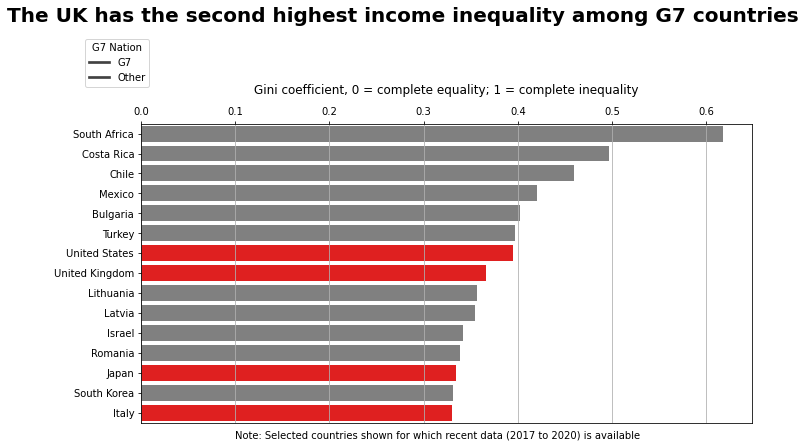

In [10]:
fig, axes = plt.subplots(figsize = (10,6))

sns.barplot(data = plot_df, x = 'VALUE', y = 'COUNTRY', palette = color_map)

fig.suptitle('The UK has the second highest income inequality among G7 countries', fontsize = 20, fontweight = 'bold', y = 1.03)
axes.set_title('Gini coefficient, 0 = complete equality; 1 = complete inequality', y = 1.08)

axes.xaxis.set_ticks_position('top')
axes.grid(axis='x')
axes.set(xlabel=None, ylabel=None)

axes.text(.1, 15.25, 'Note: Selected countries shown for which recent data (2017 to 2020) is available')

axes.legend(title = 'G7 Nation', loc='upper left', labels = ['G7', 'Other'], bbox_to_anchor=(-.1,1.3))
fig.tight_layout();

##Improving the plot